<a href="https://colab.research.google.com/github/Graziottomp/Curso_SER-347_CAP-419_INPE_2022/blob/main/Tarefa_semana_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**(a)** calcule 3 índices espectrais (NDVI, NDWI e NDBI). O NDBI (Normalized Difference Built-up Index) gera um produto que ressalta áreas construídas, e tem a seguinte fórmula:

NDBI = (SWIR1 - NIR) / (SWIR1 + NIR)

In [ ]:
#importar biblioteca Gdal com método UseException

from osgeo import gdal
gdal.UseExceptions()

#abrir o arquivo importado para a área de trabalho

dataset = gdal.Open("/LO82190762017351CUB00_B123456789_crop.tif", gdal.GA_ReadOnly)

#obtendo o GT

GT= dataset.GetGeoTransform()
print(GT)

#definindo as bandas nir, red, green e swir1

banda_nir = dataset.GetRasterBand(5)
banda_red = dataset.GetRasterBand(4)
banda_green = dataset.GetRasterBand(3)
banda_swir1 = dataset.GetRasterBand(6)

#criando a matriz das bandas

matriz_nir = banda_nir.ReadAsArray()
matriz_red = banda_red.ReadAsArray()
matriz_green = banda_green.ReadAsArray()
matriz_swir1 = banda_swir1.ReadAsArray()

#transformando as matrizes em float

matriz_nir = matriz_nir.astype(float)
matriz_red = matriz_red.astype(float)
matriz_green = matriz_green.astype(float)
matriz_swir1 = matriz_swir1.astype(float)

#calculando os indices NDVI, NDWI e NDBI

matriz_ndvi = (matriz_nir - matriz_red) / \
              (matriz_nir + matriz_red + 0.000000001)

matriz_NDWI = (matriz_green - matriz_nir) / \
              (matriz_green + matriz_nir + 0.000000001)

matriz_NDBI = (matriz_swir1 - matriz_nir) / \
              (matriz_swir1 + matriz_nir + 0.000000001)

print('Índice NDVI : ', matriz_ndvi)
print('Índice NDWI : ', matriz_NDWI)
print('Índice NDBI : ', matriz_NDBI)

(327165.0, 30.0, 0.0, -2583165.0, 0.0, -30.0)
Índice NDVI :  [[ 0.          0.33539942  0.30196338 ...  0.46000492  0.46622233
   0.        ]
 [ 0.          0.33589565  0.29882902 ...  0.44725415  0.46080849
   0.        ]
 [ 0.          0.3452616   0.31830681 ...  0.47052173  0.46096545
   0.        ]
 ...
 [ 0.          0.49640775  0.48423293 ... -0.01774829 -0.01633554
   0.        ]
 [ 0.          0.4878626   0.501782   ... -0.01089816 -0.01987048
   0.        ]
 [ 0.          0.48437801  0.48082111 ... -0.0153461  -0.01811907
   0.        ]]
Índice NDWI :  [[ 0.         -0.3012795  -0.27637456 ... -0.40535418 -0.41135005
   0.        ]
 [ 0.         -0.3011031  -0.27382704 ... -0.38691253 -0.40292276
   0.        ]
 [ 0.         -0.30756007 -0.2870973  ... -0.40304373 -0.39823579
   0.        ]
 ...
 [ 0.         -0.42715695 -0.41403716 ...  0.06620852  0.06465155
   0.        ]
 [ 0.         -0.41876547 -0.43111866 ...  0.05961617  0.06618151
   0.        ]
 [ 0.         -0.41410

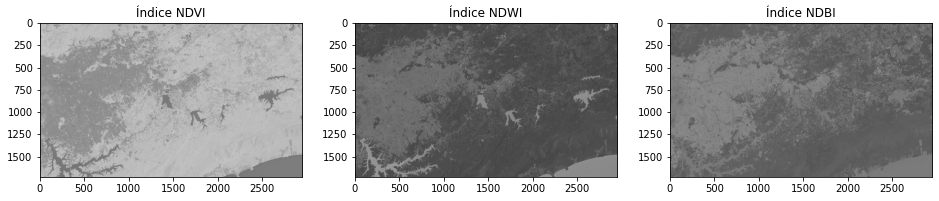

In [ ]:
#importando biblioteca de plot

import matplotlib.pyplot as plt

#tamanho das imagens
plt.figure(figsize=(16,8))

#criando o plot com 1 linha, 3 colunas
plt.subplot(131)
plt.title('Índice NDVI')
plt.imshow(matriz_ndvi, cmap='gray', vmin=-1, vmax=1.0);

plt.subplot(132)
plt.title('Índice NDWI')
plt.imshow(matriz_NDWI, cmap='gray', vmin=-1, vmax= 1.0);

plt.subplot(133)
plt.title('Índice NDBI')
plt.imshow(matriz_NDBI, cmap='gray', vmin=-1, vmax=1.0);


**(c)** mostre os valores mínimos e máximos de cada uma das 9 bandas da imagem.

In [ ]:
#criando as variáveis das bandas

banda_coastal = dataset.GetRasterBand(1)
banda_blue = dataset.GetRasterBand(2)
banda_swir2 = dataset.GetRasterBand(7)
banda_pan = dataset.GetRasterBand(8)
banda_cirrus = dataset.GetRasterBand(9)

#criando uma lista com todas a bandas
lista_bandas = [banda_coastal, banda_blue, banda_green,
                banda_nir, banda_red, banda_swir1,
                banda_swir2, banda_pan, banda_cirrus]

#looping para gerar o menor e maior valor de cada banda
for nome_banda in lista_bandas:
    menor_valor, maior_valor = nome_banda.ComputeRasterMinMax()

    print(nome_banda, ': Maior valor: ', maior_valor,
          ', Menor Valor:', menor_valor)



<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7ff304e17630> > : Maior valor:  54603.0 , Menor Valor: 0.0
<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7ff304e176f0> > : Maior valor:  52485.0 , Menor Valor: 0.0
<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7ff304e69420> > : Maior valor:  57614.0 , Menor Valor: 0.0
<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7ff304e69f30> > : Maior valor:  65535.0 , Menor Valor: 0.0
<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7ff304e77990> > : Maior valor:  65535.0 , Menor Valor: 0.0
<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7ff304e69ae0> > : Maior valor:  65535.0 , Menor Valor: 0.0
<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7ff304e17750> > : Maior valor:  59742.0 , Menor Valor: 0.0
<osgeo.gdal.Band; proxy of <Swig Object o